Nama: Syalista Galuh Nadira

NIM: 2702346361

Kelas: LA09

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import pickle

## **No. 1**

In [3]:
df = pd.read_csv("Dataset_A_loan.csv")

df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.tail()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


In [5]:
# Number of rows and columns
df.shape

(45000, 14)

The dataset contains 45000 records and 14 columns/variables.

In [6]:
# Columns in dataset
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [7]:
# Descriptive statistic of numerical columns
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.275000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.018223e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,7.331158e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.726725e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.705500e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.582125e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,5.556399e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [8]:
# Summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   42750 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [9]:
# Checking value formats in categorical variables

numerical_cols = df._get_numeric_data().columns
categorical_cols = list(set(df.columns) - set(numerical_cols))

for i in categorical_cols:
    x = df[i].value_counts()
    print(x)
    print()

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

person_gender
male       24799
female     20111
Male          45
fe male       45
Name: count, dtype: int64

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64



### **Masalah dalam dataset**:
- Format nilai dalam person_gender tidak seragam
- Dataset belum dibagi menjadi train dan test
- Kolom 'person_income' memiliki nilai yang hilang
- Ada beberapa variabel kategoris yang memerlukan pengkodean

**Handling problems in dataset**

1. Ubah format yg salah di person_gender

In [10]:
df['person_gender'].replace({'Male':'male', 'fe male':'female'}, inplace = True)

In [11]:
df['person_gender'].value_counts()

,count
person_gender,
male,24844
female,20156


2. Data Spliting

In [12]:
# target variable (y) adalah loan_status
df_input = df.drop('loan_status', axis=1)
df_output = df['loan_status']

# training data = 80%, testing data = 20%
x_train, x_test, y_train, y_test, = train_test_split(df_input, df_output, test_size = 0.2, random_state = 42, stratify=df_output)

In [13]:
print(x_train.shape)
print(x_test.shape)

(36000, 13)
(9000, 13)


3. Impute missing values


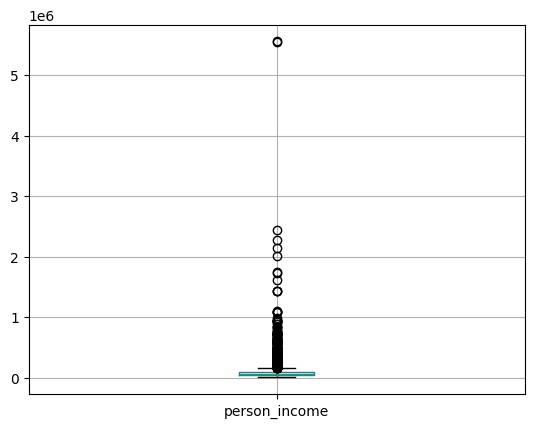

In [14]:
# Cek apakah ada outliers
boxplot = x_train.boxplot(column=['person_income'])
plt.show()

In [15]:
# Impute dengan median karena less sensitive to outliers dibandingkan mean
x_train['person_income'] = x_train['person_income'].fillna(x_train['person_income'].median())
x_test['person_income'] = x_test['person_income'].fillna(x_test['person_income'].median())

# Cek sisa missing value
print(x_train.isnull().any())
print(x_test.isnull().any())

person_age                        False
person_gender                     False
person_education                  False
person_income                     False
person_emp_exp                    False
person_home_ownership             False
loan_amnt                         False
loan_intent                       False
loan_int_rate                     False
loan_percent_income               False
cb_person_cred_hist_length        False
credit_score                      False
previous_loan_defaults_on_file    False
dtype: bool
person_age                        False
person_gender                     False
person_education                  False
person_income                     False
person_emp_exp                    False
person_home_ownership             False
loan_amnt                         False
loan_intent                       False
loan_int_rate                     False
loan_percent_income               False
cb_person_cred_hist_length        False
credit_score                

4.  Encode categorical variables

In [16]:
for i in categorical_cols:
    x = df[i].value_counts()
    print(x)
    print()

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

person_gender
male      24844
female    20156
Name: count, dtype: int64

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64



Saya akan menggunakan encoder berikut berdasarkan sifat setiap categorical variables:
- **OrdinalEncoder** untuk variabel dengan urutan hierarki -> *person_education*
- **LabelEncoder** untuk variabel binary -> *person_gender*, *previous_loan_defaults_on_file*
- **OneHotEncoder** untuk variabel nominal -> *loan_intent*, *person_home_ownership*

In [17]:
# OrdinalEncoder untuk person_education
edu_levels = ['High School', 'Associate', 'Bachelor', 'Master', 'Doctorate']
ordinal_enc = OrdinalEncoder(categories=[edu_levels])
x_train['person_education'] = ordinal_enc.fit_transform(x_train[['person_education']]) + 1 # +1 so the index will start from 1
x_test['person_education'] = ordinal_enc.transform(x_test[['person_education']]) + 1

In [18]:
# LabelEncoder untuk person_gender, previous_loan_defaults_on_file
gender_enc = LabelEncoder()
default_enc = LabelEncoder()

x_train['person_gender'] = gender_enc.fit_transform(x_train['person_gender'])
x_test['person_gender'] = gender_enc.transform(x_test['person_gender'])

x_train['previous_loan_defaults_on_file'] = default_enc.fit_transform(x_train['previous_loan_defaults_on_file'])
x_test['previous_loan_defaults_on_file'] = default_enc.transform(x_test['previous_loan_defaults_on_file'])

In [19]:
# OneHotEncoder untuk loan_intent, person_home_ownership
onehot_enc = OneHotEncoder(drop='first', sparse_output=False)
x_train_enc = pd.DataFrame(onehot_enc.fit_transform(x_train[['loan_intent', 'person_home_ownership']]), columns=onehot_enc.get_feature_names_out(['loan_intent', 'person_home_ownership']))
x_test_enc = pd.DataFrame(onehot_enc.transform(x_test[['loan_intent', 'person_home_ownership']]), columns=onehot_enc.get_feature_names_out(['loan_intent', 'person_home_ownership']))

x_train = pd.concat([x_train.drop(['loan_intent', 'person_home_ownership'], axis=1).reset_index(drop=True),
                    x_train_enc], axis=1)
x_test = pd.concat([x_test.drop(['loan_intent', 'person_home_ownership'], axis=1).reset_index(drop=True),
                   x_test_enc], axis=1)

In [20]:
x_train.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT
0,24.0,1,4.0,58914.0,2,4400.0,5.99,0.07,4.0,656,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,23.0,0,1.0,45873.0,2,11000.0,11.01,0.24,2.0,634,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,29.0,0,4.0,240947.0,7,10000.0,12.69,0.04,9.0,638,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,30.0,0,3.0,96316.0,10,6000.0,13.49,0.06,8.0,682,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,29.0,1,3.0,73033.0,7,8000.0,10.51,0.11,8.0,644,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
x_train.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT'],
      dtype='object')

Semua sudah terencode dengan baik.

### Model Training

a. Random Forest

Saya biarkan parameternya default dulu dan tidak tune hyperparameter.

In [ ]:
RF = RandomForestClassifier()
RF.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_predict = RF.predict(x_test)
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0', '1']))


Classification Report

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7000
           1       0.90      0.77      0.83      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



b. XGboost

Saya biarkan parameternya default dulu dan tidak tune hyperparameter.

In [ ]:
XGB = XGBClassifier()
XGB.fit(x_train, y_train)

y_predict = XGB.predict(x_test)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0', '1']))


Classification Report

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7000
           1       0.89      0.80      0.84      2000

    accuracy                           0.93      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



Saya tidak akan pakai akurasi sebagai scoring metric karena datanya imbalance. Saya akan fokus pada precision, recall, dan F1 score.

**Perbandingan antara model Random Forest dan XGboost**
- Precision: Random Forest dan XGBoost menunjukkan presisi yang sama, artinya keduanya sama-sama efektif dalam menghindari positif palsu.

- Recall: XGBoost bekerja lebih baik dalam recall, khususnya untuk kelas minoritas. Ini menunjukkan bahwa XGBoost menangkap lebih banyak positif sejati, mengurangi risiko kasus penting yang terlewatkan.

- F1 score: XGBoost juga memiliki skor f1 yang sedikit lebih tinggi, menunjukkan keseimbangan yang lebih baik antara presisi dan recall.

- Handle imbalance data: XGBoost menangani imbalance class dengan lebih efektif, membuatnya lebih cocok untuk kumpulan data dengan distribusi kelas yang tidak merata.

**Kesimpulan**:
XGBoost adalah pilihan yang lebih baik secara keseluruhan, kinerja yang lebih seimbang dan handal, khususnya saat mengidentifikasi class minoritas dengan benar.

**Tuning hyperparameters XGboost**

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_model = xgb.XGBClassifier()

XGB_tuned = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='recall', cv=3, verbose=1)
XGB_tuned.fit(x_train, y_train)

print("Tuned Hyperparameters: ", XGB_tuned.best_params_)

best_model = XGB_tuned.best_estimator_
y_pred = best_model.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Tuned Hyperparameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200, 'subsample': 1.0}
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      7000
           1       0.89      0.81      0.85      2000

    accuracy                           0.94      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.94      0.93      9000



Hasilnya sedikit meningkat tapi tidak signifikan, tapi ini sudah baik karena mendekati angka 1.00

**Save as pickle**

In [ ]:
with open('XGB_tuned.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

Saya juga save encoders yg telah digunakan dan kolom-kolom akhir yang tersisa untuk proses deployment nanti.

In [25]:
pickle.dump(ordinal_enc, open('ordinal_enc.pkl', 'wb'))
pickle.dump(gender_enc, open('gender_enc.pkl', 'wb'))
pickle.dump(default_enc, open('default_enc.pkl', 'wb'))
pickle.dump(onehot_enc, open('onehot_enc.pkl', 'wb'))

In [25]:
with open('final_columns.pkl', 'wb') as f:
    pickle.dump(x_train.columns.tolist(), f)

### Pembuktian dengan test case

In [38]:
df.loc[21] # test case 1 (rejected)

,21
person_age,25.0
person_gender,male
person_education,High School
person_income,165792.0
person_emp_exp,4
person_home_ownership,RENT
loan_amnt,34800.0
loan_intent,PERSONAL
loan_int_rate,16.77
loan_percent_income,0.21


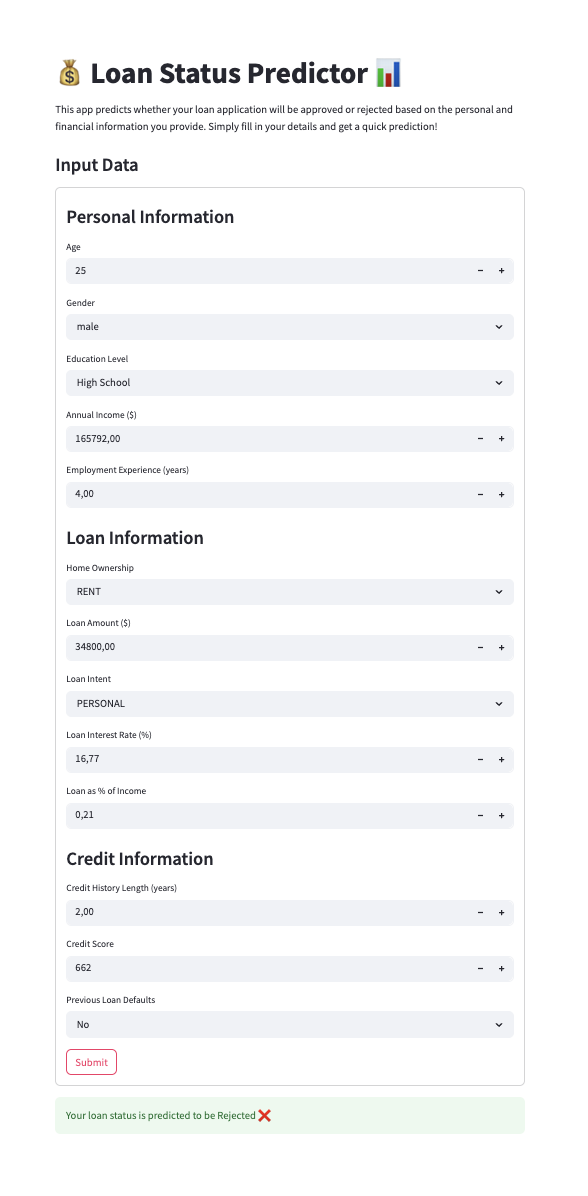

In [36]:
df.loc[22] # test case 2 (accepted)

,22
person_age,22.0
person_gender,female
person_education,Master
person_income,79255.0
person_emp_exp,0
person_home_ownership,RENT
loan_amnt,34000.0
loan_intent,EDUCATION
loan_int_rate,17.58
loan_percent_income,0.43


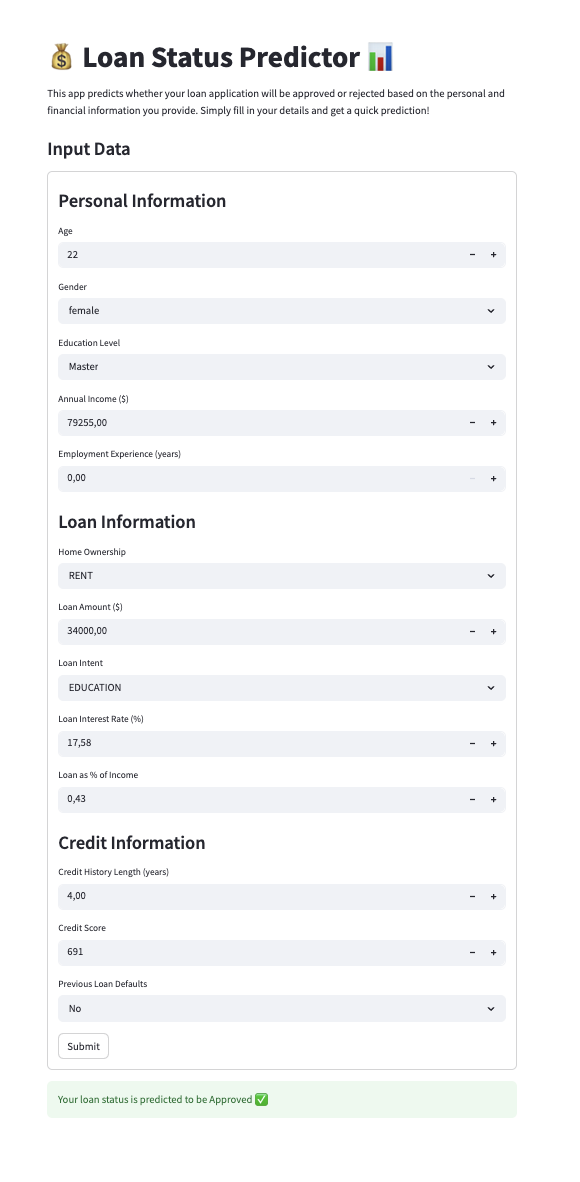